In [39]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [40]:
file_path = '/content/SAMSUNG.csv'

# Đọc dữ liệu từ file CSV
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)

In [41]:
df

,Close,Open,High,Low
Date,,,,
2019-03-01,44387.5,44500.0,45112.5,44012.5
2019-03-02,44387.5,44500.0,45112.5,44012.5
2019-03-03,44387.5,44500.0,45112.5,44012.5
2019-03-04,44850.0,46000.0,46100.0,44800.0
2019-03-05,44250.0,44600.0,45100.0,44150.0
...,...,...,...,...
2024-05-28,77600.0,76500.0,78000.0,76200.0
2024-05-29,75200.0,77700.0,78200.0,75200.0
2024-05-30,73500.0,74800.0,75200.0,73500.0


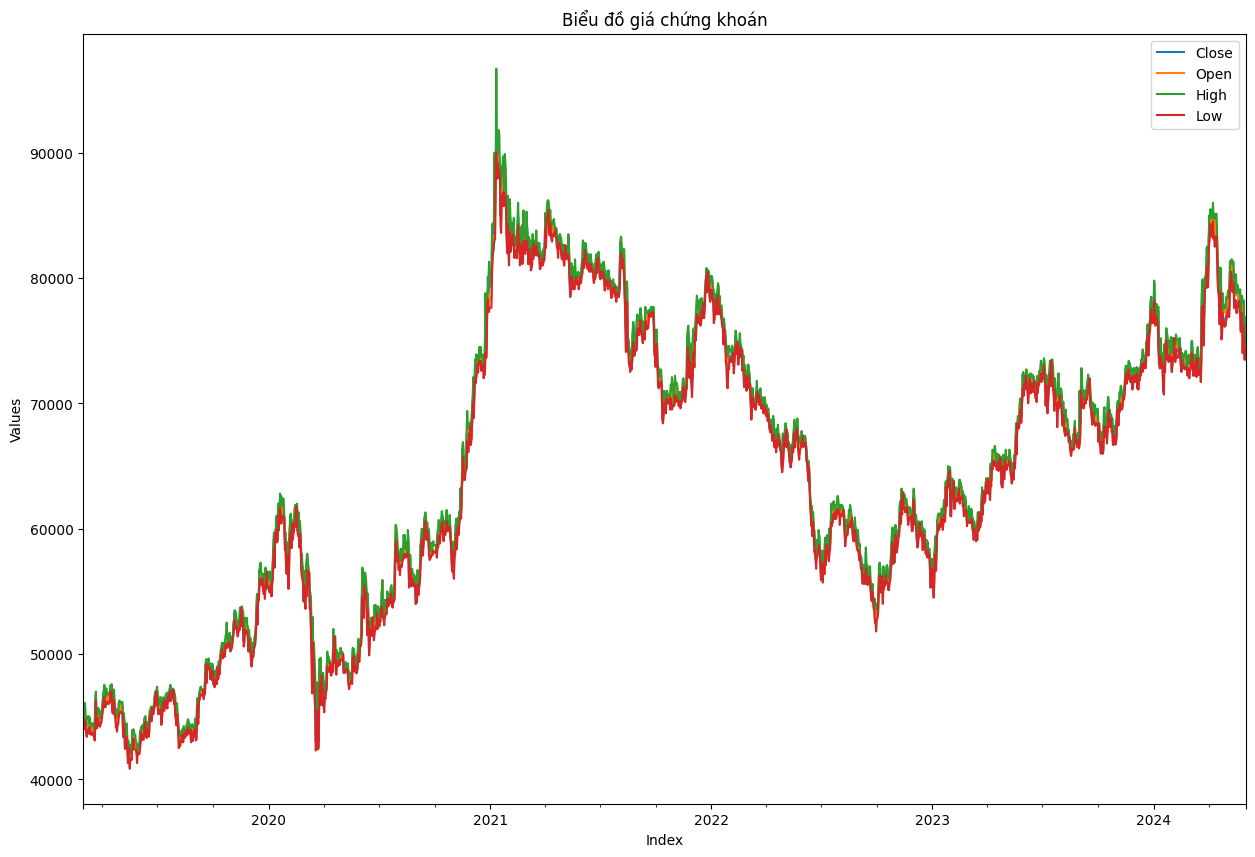

In [42]:

plt.rcParams["figure.figsize"] = [15, 10]

# Thực hiện vẽ biểu đồ
df.plot()
plt.title('Biểu đồ giá chứng khoán')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(loc='best')
plt.show()

In [43]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(df)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -1.8322087774440814
p-value: 0.3645921953030643
Critical Values:
   1%: -3.433772946369569
   5%: -2.8630520356606137
   10%: -2.567574949489954
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -1.7624397543242178
p-value: 0.3992622118476888
Critical Values:
   1%: -3.4337711555892523
   5%: -2.8630512450631986
   10%: -2.567574528530358
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -1.7866787602620005
p-value: 0.38709508686169447
Critical Values:
   1%: -3.433807330975515
   5%: -2.8630672157562103
   10%: -2.567583032262165
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -1.9234587110577184
p-value: 0.32110712996764784
Critical Values:
   1%: -3.4337891481553133
   5%: -2.8630591884371612
   10%: -2.5675787580436586
==> Không phải chuỗi dừng



In [44]:
from sklearn.model_selection import train_test_split

# chia bộ dữ liệu theo tỉ lệ 8:2
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# dùng diff để chuyển đổi bộ dữ liệu
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [45]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(train_diff)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -33.74232476889372
p-value: 0.0
Critical Values:
   1%: -3.4346228529495666
   5%: -2.8634272008756785
   10%: -2.5677747177787733
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -20.60034170140808
p-value: 0.0
Critical Values:
   1%: -3.4346284441307184
   5%: -2.863429668579316
   10%: -2.5677760318409732
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -7.346255037098563
p-value: 1.0337467106742528e-10
Critical Values:
   1%: -3.434688047280661
   5%: -2.8634559745259227
   10%: -2.5677900399105305
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -13.87642428487817
p-value: 6.326241578606001e-26
Critical Values:
   1%: -3.434639670505874
   5%: -2.8634346233980663
   10%: -2.567778670304311
==> Là chuỗi dừng



In [46]:
!pip install pmdarima

In [47]:
from pmdarima import auto_arima
import pandas as pd
pq = []
for column in train_diff:
    print(f'Cột : {column}')
    stepwise_model = auto_arima(train_diff[column],start_p=1, start_q=1,max_p=5, max_q=5, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)

    parameter = stepwise_model.get_params().get('order')
    print(f'bậc tối ưu cho cột:{column} là: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Cột : Close
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=25291.682, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25369.040, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=25300.558, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=25290.135, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=25291.395, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=25290.126, Time=0.82 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=25284.563, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=25287.820, Time=0.59 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=25286.531, Time=3.37 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=25286.592, Time=1.37 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=25284.592, Time=0.86 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=25284.822, Time=1.45 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=25287.172, Time=3.27 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=25286.441, Time=2.43 sec

Best m

In [48]:
pq

[(2, 0, 2), (0, 0, 2), (3, 0, 1), (4, 0, 2)]

In [49]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns:
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [50]:
df_results_grid = pd.DataFrame(columns=['p', 'q', 'RMSE Open', 'RMSE High', 'RMSE Low', 'RMSE Close'])

for i in pq:
    if i[0] == 0 and i[2] == 0:
        pass
    else:
        print(f'Running for {i}')
        model = VARMAX(train_diff, order=(i[0], i[2])).fit()
        result = model.forecast(steps=len(test))
        inv_res = inverse_diff(df, result)
        Opensrmse = np.sqrt(metrics.mean_squared_error(test['Open'], inv_res.Open_1st_inv_diff))
        Highrmse = np.sqrt(metrics.mean_squared_error(test['High'], inv_res.High_1st_inv_diff))
        Lowrmse = np.sqrt(metrics.mean_squared_error(test['Low'], inv_res.Low_1st_inv_diff))
        Closermse = np.sqrt(metrics.mean_squared_error(test['Close'], inv_res.Close_1st_inv_diff))

        new_row = {'p': i[0], 'q': i[2], 'RMSE Open': Opensrmse, 'RMSE High': Highrmse, 'RMSE Low': Lowrmse, 'RMSE Close': Closermse}
        df_results_grid = pd.concat([df_results_grid, pd.DataFrame([new_row])], ignore_index=True)



Running for (2, 0, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Running for (0, 0, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Running for (3, 0, 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Running for (4, 0, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
df_results_grid.sort_values(by = ['RMSE Open','RMSE High','RMSE Low','RMSE Close'] )

,p,q,RMSE Open,RMSE High,RMSE Low,RMSE Close
1,0,2,6396.090399,7191.100444,5428.242636,6125.845840
0,2,2,6699.188828,7366.980000,5631.046681,6297.201813
3,4,2,7260.527373,8039.434020,6059.928279,6746.757732
2,3,1,7560.848647,7683.491293,6001.152403,6045.177245


In [52]:
best_p = df_results_grid.loc[0, 'p']
best_q = df_results_grid.loc[0, 'q']

model = VARMAX(train_diff, order=(best_p, best_q))
results = model.fit()

print(f'p: {best_p}, q: {best_q}')
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 2, q: 2
                                  Statespace Model Results                                  
Dep. Variable:     ['Close', 'Open', 'High', 'Low']   No. Observations:                 1535
Model:                                   VARMA(2,2)   Log Likelihood              -46525.492
                                        + intercept   AIC                          93206.985
Date:                              Thu, 20 Jun 2024   BIC                          93623.215
Time:                                      04:50:09   HQIC                         93361.866
Sample:                                  03-02-2019                                         
                                       - 05-14-2023                                         
Covariance Type:                                opg                                         
Ljung-Box (L1) (Q):     0.45, 0.04, 0.23, 0.10   Jarque-Bera (JB):   596.88, 534.31, 13115.19, 3389.97
Prob(Q):                0.50, 0.84, 0.63, 0.76   

In [53]:
predict = results.get_prediction(start = len(train), end = len(train) + len(test) - 1)
predicts = predict.predicted_mean

In [54]:
predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
predicts['Date'] = test.index
predicts
predicts_date = predicts.set_index('Date')
predicts_date

,Open_predicted,High_predicted,Low_predicted,Close_predicted
Date,,,,
2023-05-15,133.083353,4.368107,169.741288,-2.188090
2023-05-16,-56.042743,112.421543,-68.268912,49.794686
2023-05-17,3.321817,-58.469177,9.186236,-26.633106
2023-05-18,30.975163,35.840938,21.219861,30.551722
2023-05-19,8.395647,11.691314,15.230883,12.277864
...,...,...,...,...
2024-05-28,13.890079,14.248330,13.334692,14.281556
2024-05-29,13.890079,14.248330,13.334692,14.281556
2024-05-30,13.890079,14.248330,13.334692,14.281556


In [55]:
# Lấy giá trị cuối cùng của dữ liệu gốc trước khi diff
last_original_values = df.iloc[-len(test) - 1]
# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'], index=test.index)

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values.copy()

# Thực hiện inverse differencing cho từng ngày dự đoán
for index, row in predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data.loc[index] = current_values

In [56]:


# Tính toán MAPE và RMSE
mape = mean_absolute_percentage_error(test, predicts_date)
rmse = np.sqrt(mean_squared_error(test, predicts_date))
mse = mean_squared_error(test, predicts_date)

print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'MAPE: {mape:.4f}')

results_VARMA = pd.DataFrame([['VARMA', mape, mse, rmse]],
               columns = ['Model', 'RMSE', 'MSE', 'MAPE'])
results_VARMA

RMSE: 72979.9157
MSE: 5326068095.0969
MAPE: 0.9998


,Model,RMSE,MSE,MAPE
0,VARMA,0.999806,5.326068e+09,72979.915697


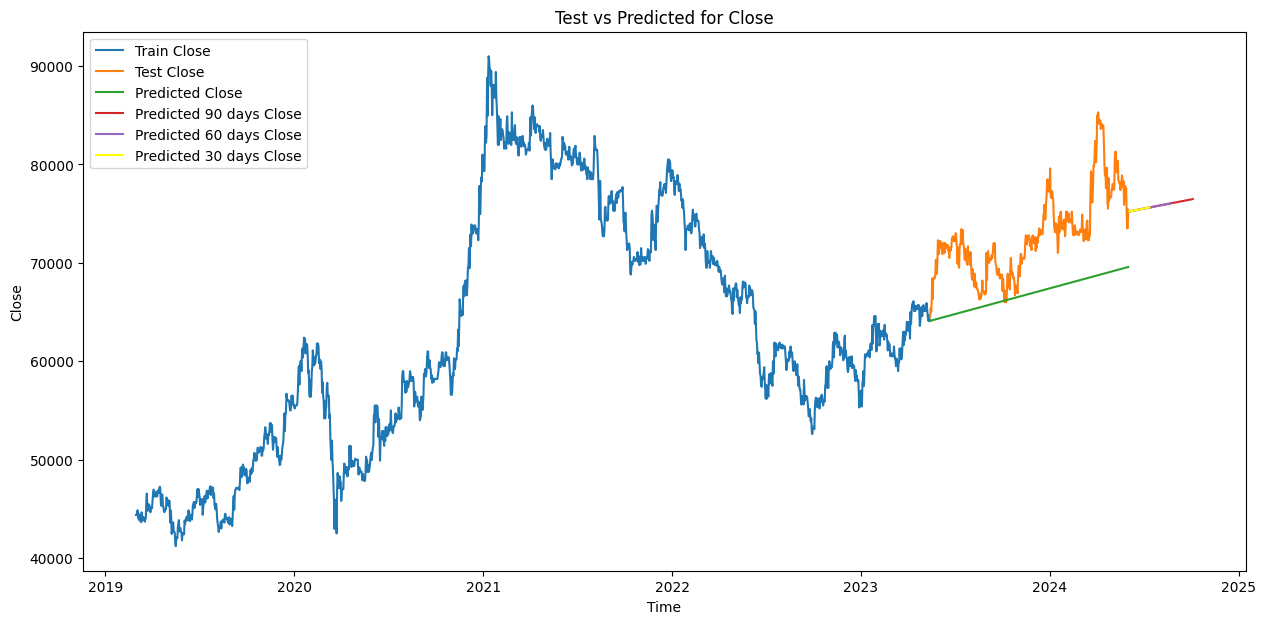

In [57]:
last_original_values_afterPredict = df.iloc[len(df) - 1]  # Adjust this as per your data

# Function to forecast and inverse differencing for given days
def forecast_and_inverse_diff(forecast_days):
    forecast_data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])
    current_values = last_original_values_afterPredict.copy()

    future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='B')
    future_predict = results.get_forecast(steps=forecast_days)
    future_predicts = future_predict.predicted_mean
    future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
    future_predicts['Date'] = future_dates
    future_predicts_date = future_predicts.set_index('Date')

    for index, row in future_predicts_date.iterrows():
        current_values['Open'] += row['Open_predicted']
        current_values['High'] += row['High_predicted']
        current_values['Low'] += row['Low_predicted']
        current_values['Close'] += row['Close_predicted']
        forecast_data.loc[index] = current_values.copy()

    return forecast_data

# Forecast for 30, 60, and 90 days
forecast_data_30days = forecast_and_inverse_diff(30)
forecast_data_60days = forecast_and_inverse_diff(60)
forecast_data_90days = forecast_and_inverse_diff(90)

# Plotting
for col in ['Close']:
    plt.figure(figsize=(15, 7))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_90days.index, forecast_data_90days[col], label=f'Predicted 90 days {col}')
    plt.plot(forecast_data_60days.index, forecast_data_60days[col], label=f'Predicted 60 days {col}')
    plt.plot(forecast_data_30days.index, forecast_data_30days[col], label=f'Predicted 30 days {col}', color = "yellow")
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()